In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Matplotlib is building the font cache; this may take a moment.


In [2]:
tesla_df = pd.read_csv('TESLA Search Trend vs Price.csv')
btc_search_df = pd.read_csv('Bitcoin Search Trend.csv')
btc_price_df = pd.read_csv('Daily Bitcoin Price.csv')
ue_benefits_df = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

**Tesla**

In [3]:
tesla_df.shape

(124, 3)

In [4]:
tesla_df.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [5]:
print(f'The largest number is the web search data column is {tesla_df.TSLA_WEB_SEARCH.max()}')
print(f'The smallest number in the web search data column is {tesla_df.TSLA_WEB_SEARCH.min()}')

The largest number is the web search data column is 31
The smallest number in the web search data column is 2


In [6]:
tesla_df.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


**Unemployment Benefits**

In [7]:
print(ue_benefits_df.shape)
ue_benefits_df.head()

(200, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [28]:
print(f'The largest number in the web search data column is {ue_benefits_df.UE_BENEFITS_WEB_SEARCH.max()}')
print(f'The smallest number in the web search data column is {ue_benefits_df.UE_BENEFITS_WEB_SEARCH.min()}')

The largest number in the web search data column is 100
The smallest number in the web search data column is 4


In [8]:
ue_benefits_df.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,200.000000,200.000000
mean,10.315000,6.173000
std,10.778061,2.128267
min,4.000000,3.500000
25%,5.000000,4.600000
50%,7.000000,5.400000
75%,12.000000,7.825000
max,100.000000,14.700000


**Bitcoin Price**

In [9]:
print(btc_price_df.shape)
btc_price_df.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [10]:
print(f'The largest number in the web search data column is {btc_price_df.CLOSE.max()}')
print(f'The smallest number in the web search data column is {btc_price_df.CLOSE.min()}')

The largest number in the web search data column is 19497.400391
The smallest number in the web search data column is 178.102997


In [11]:
btc_price_df.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


**Bitcoin Search**

In [12]:
print(btc_search_df.shape)
btc_search_df.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [13]:
print(f'The largest number in the web search data column is {btc_search_df.BTC_NEWS_SEARCH.max()}')
print(f'The smallest number in the web search data column is {btc_search_df.BTC_NEWS_SEARCH.min()}')

The largest number in the web search data column is 100
The smallest number in the web search data column is 3


In [14]:
btc_search_df.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


**Missing Values**

In [15]:
print(f'Missing values for Telsa?: {tesla_df.isna().values.any()}')
print(f'Missing values for Unemployment Benefits?: {ue_benefits_df.isna().values.any()}')
print(f'Missing values for Bitcoin search?: {btc_search_df.isna().values.any()}')
print(f'Missing values for Bitcoin Price?: {btc_price_df.isna().values.any()}. How many missing values?: {btc_price_df.isna().values.sum()}')

Missing values for Telsa?: False
Missing values for Unemployment Benefits?: False
Missing values for Bitcoin search?: False
Missing values for Bitcoin Price?: True. How many missing values?: 2


In [17]:
btc_price_df.dropna(inplace=True)

In [18]:
print(f'Missing values for Bitcoin price?: {btc_price_df.isna().values.any()}')

Missing values for Bitcoin price?: False


**Convert to Datetime object**

In [19]:
tesla_df.MONTH = pd.to_datetime(tesla_df.MONTH)

In [20]:
ue_benefits_df.MONTH = pd.to_datetime(ue_benefits_df.MONTH)

In [21]:
btc_price_df.DATE = pd.to_datetime(btc_price_df.DATE)

In [22]:
btc_search_df.MONTH = pd.to_datetime(btc_search_df.MONTH)

In [23]:
tesla_df.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [24]:
btc_price_month_df = btc_price_df.resample('M', on='DATE').last()
btc_price_month_df.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [25]:
btc_price_month_df.shape

(73, 3)

In [26]:
btc_search_df.shape

(73, 2)

In [27]:
tesla_df.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


<h3> Data Visualization </h3>

In [28]:
year = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

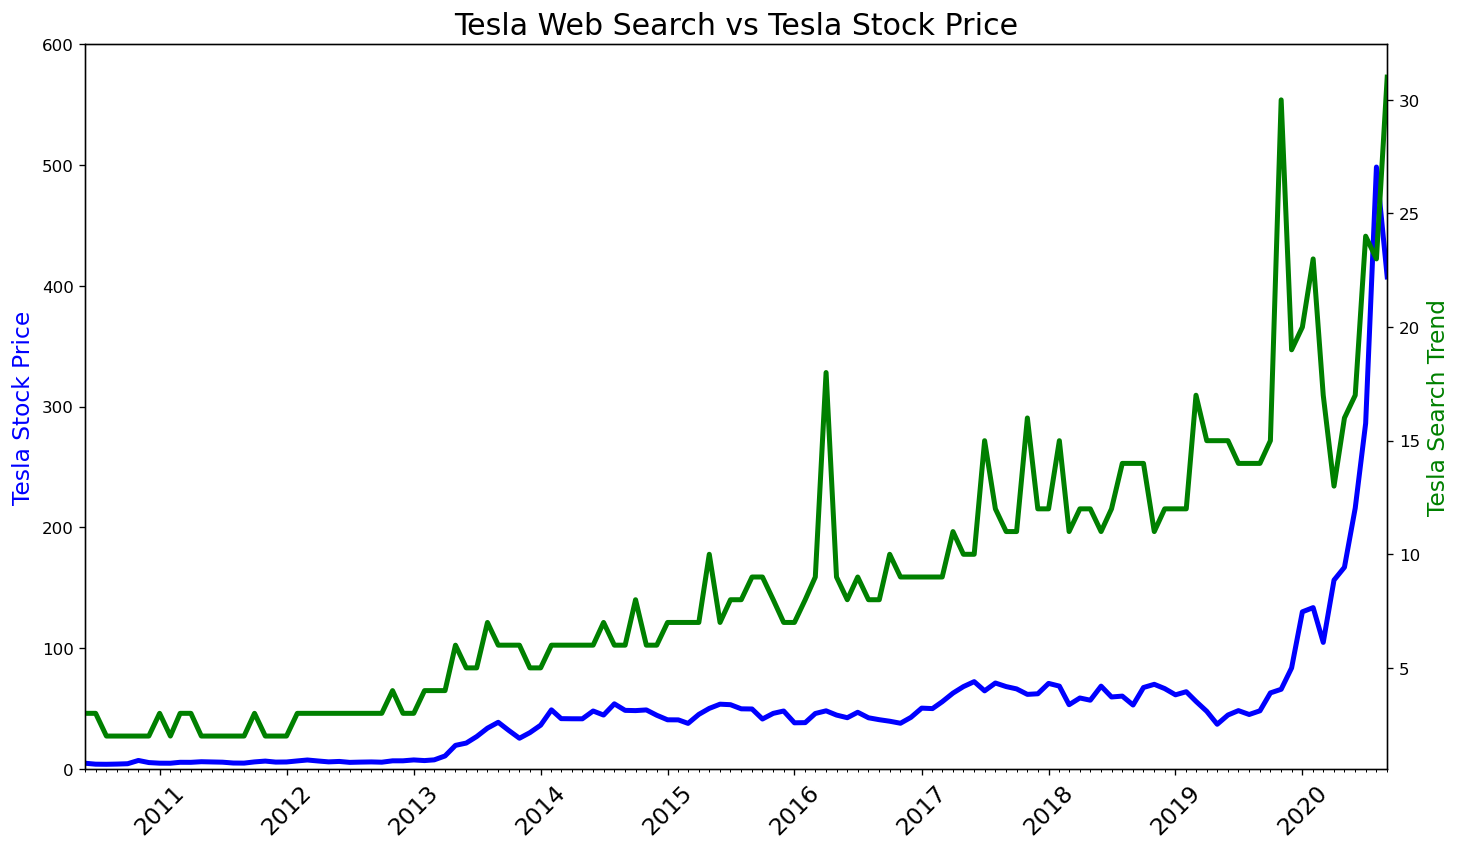

In [29]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Tesla Stock Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('Tesla Stock Price', color='Blue', fontsize=14)
ax2.set_ylabel('Tesla Search Trend', color='green', fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([tesla_df.MONTH.min(), tesla_df.MONTH.max()])

ax1.plot(tesla_df.MONTH, tesla_df.TSLA_USD_CLOSE, 'b', linewidth=3)
ax2.plot(tesla_df.MONTH, tesla_df.TSLA_WEB_SEARCH, 'g', linewidth=3)


plt.show()

In [30]:
btc_price_df.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


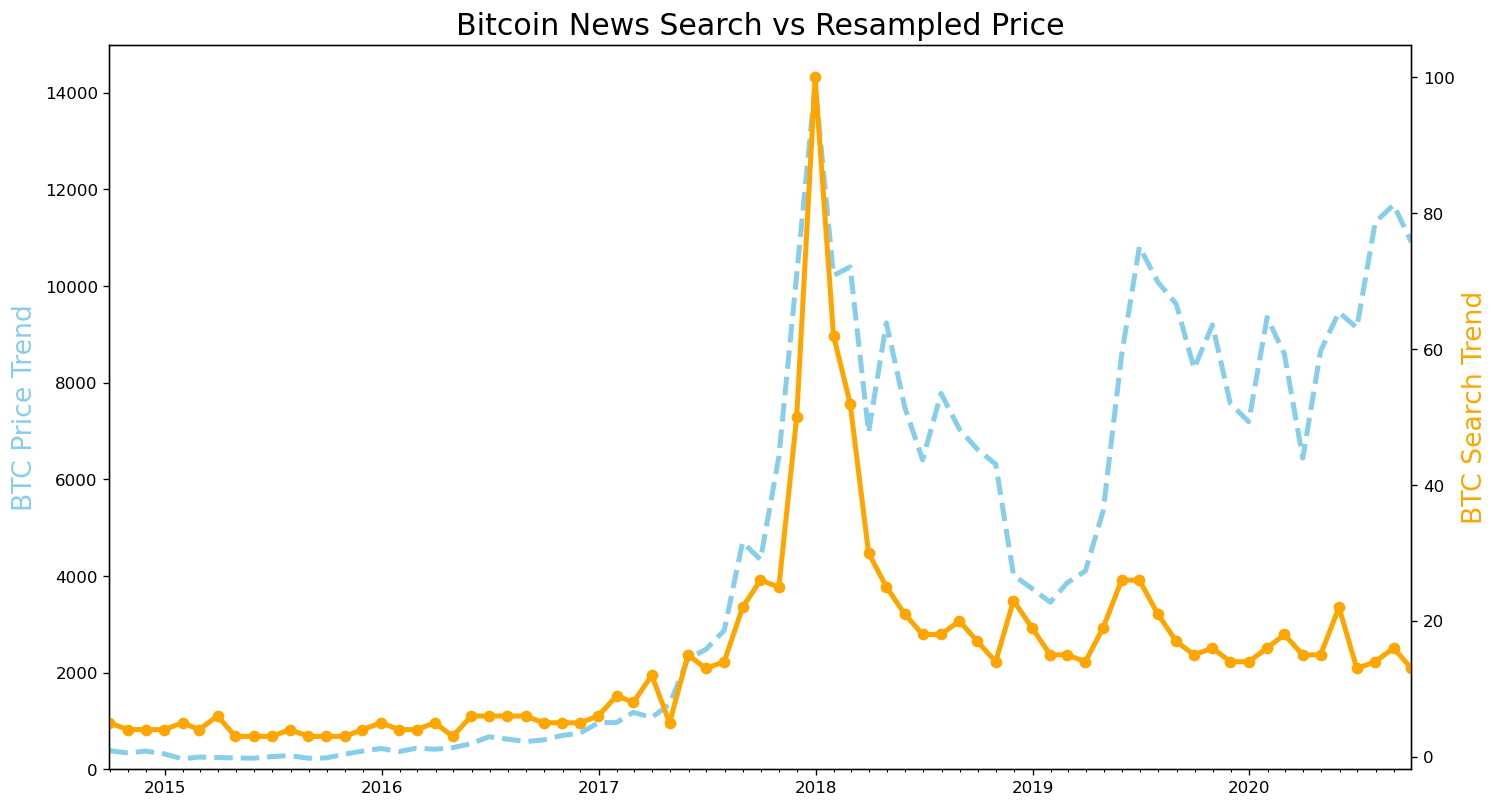

In [31]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([btc_price_month_df.index.min()], btc_price_month_df.index.max())

ax1.set_ylabel('BTC Price Trend', fontsize=16, color='skyblue')
ax2.set_ylabel('BTC Search Trend', fontsize=16, color='orange')

ax1.plot(btc_price_month_df.index, btc_price_month_df.CLOSE, linewidth=3, linestyle='--', color='skyblue')
ax2.plot(btc_price_month_df.index, btc_search_df.BTC_NEWS_SEARCH, linewidth=3, marker='o', color='orange')

plt.show()

In [32]:
ue_benefits_df.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


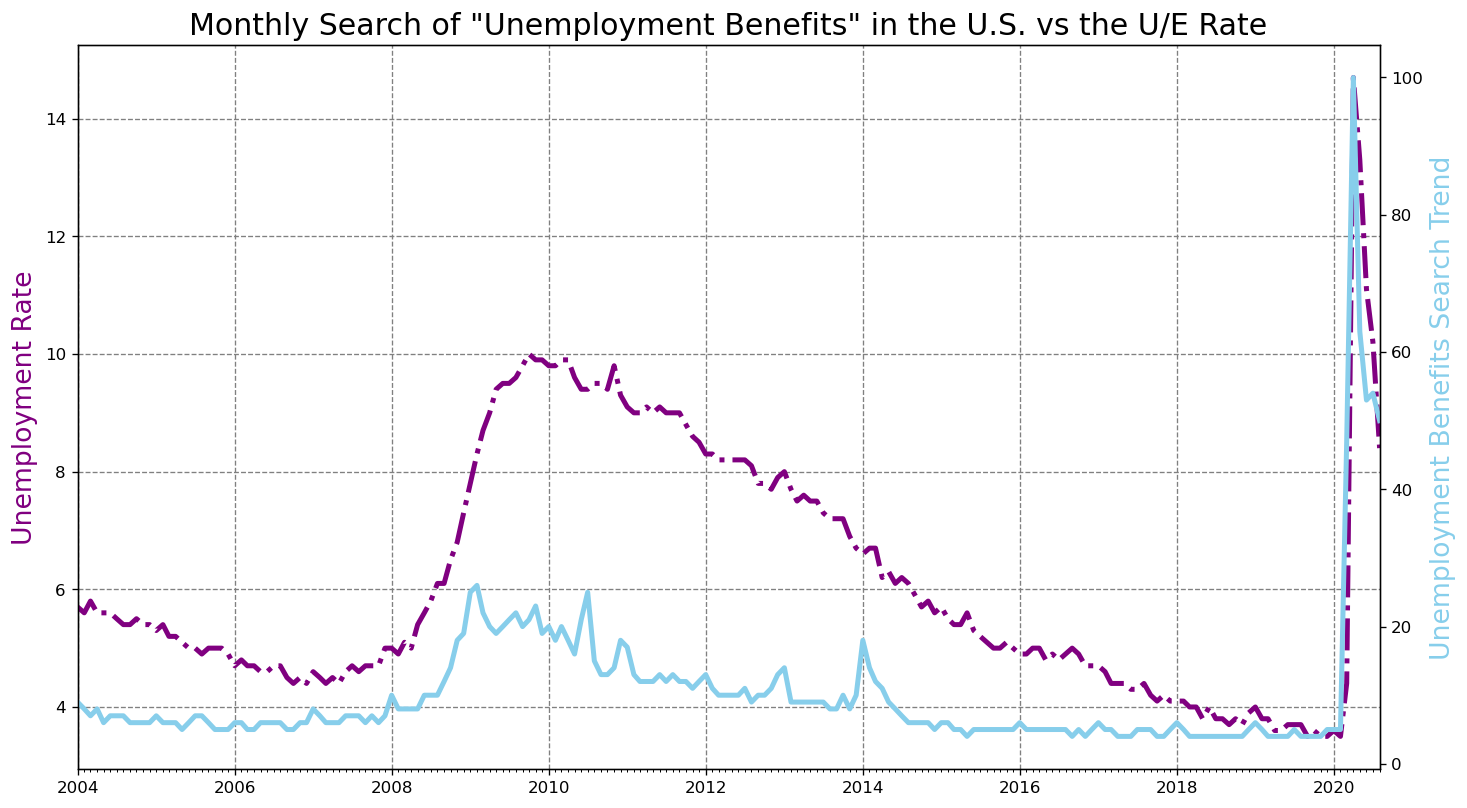

In [34]:
rolling_df = ue_benefits_df[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
plt.figure(figsize=(14, 8), dpi=120)

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('Unemployment Rate', color='purple', fontsize=16)
ax2.set_ylabel('Unemployment Benefits Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([ue_benefits_df.MONTH.min(), ue_benefits_df.MONTH.max()])
ax1.grid(color='grey', linestyle='--')

ax1.plot(ue_benefits_df.MONTH, ue_benefits_df.UNRATE, color='purple', linewidth=3, linestyle='-.')
ax2.plot(ue_benefits_df.MONTH, ue_benefits_df.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

In [35]:
old_ue_df = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')
old_ue_df.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [36]:
old_ue_df.MONTH = pd.to_datetime(old_ue_df.MONTH)
type(old_ue_df.MONTH[1])

pandas._libs.tslibs.timestamps.Timestamp

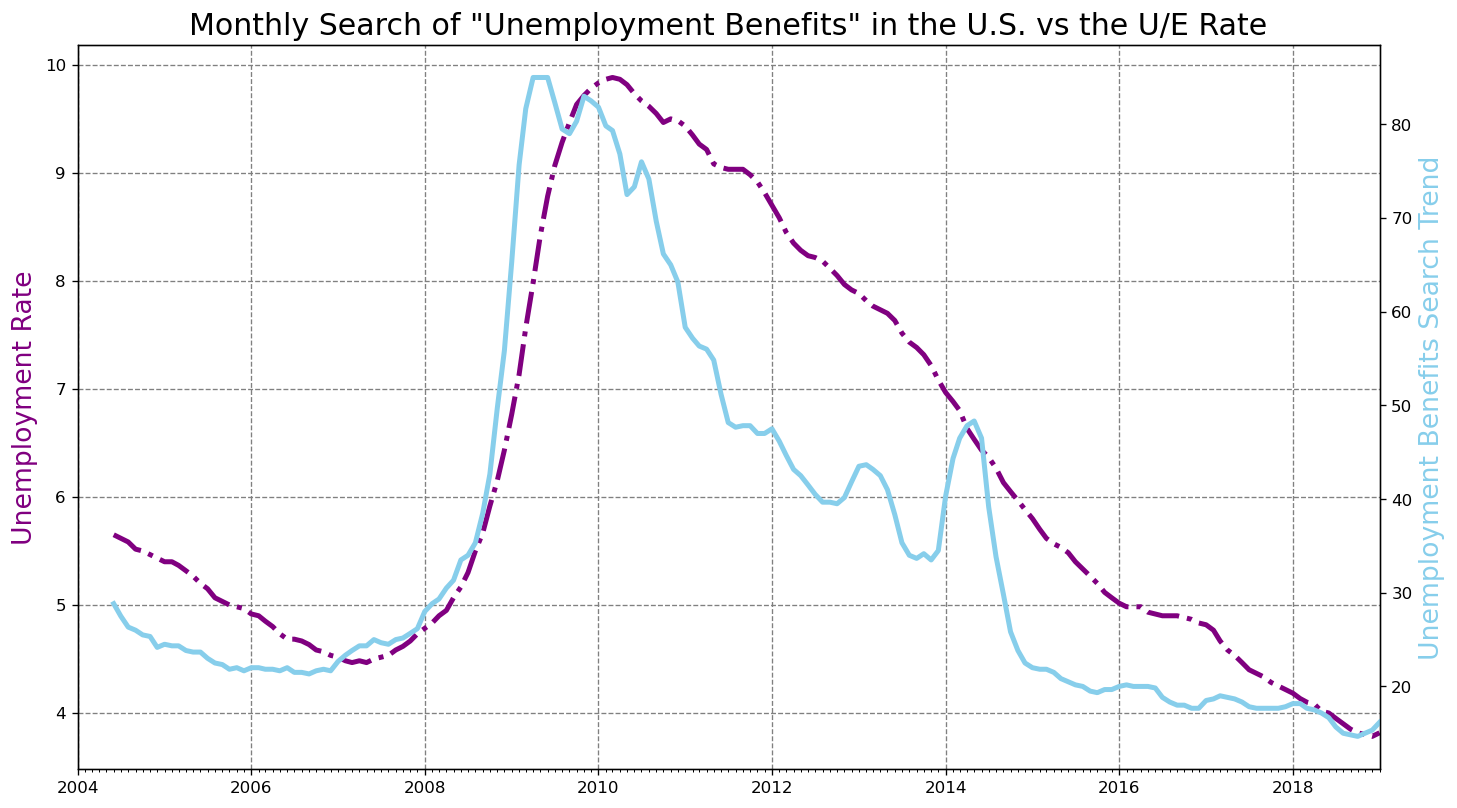

In [37]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim([old_ue_df.MONTH.min(), old_ue_df.MONTH.max()])
ax1.grid(color='grey', linestyle='--')

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('Unemployment Rate', color='purple', fontsize=16)
ax2.set_ylabel('Unemployment Benefits Search Trend', color='skyblue', fontsize=16)

rolling_df = old_ue_df[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
ax1.plot(old_ue_df.MONTH, rolling_df.UNRATE, color='purple', linewidth=3, linestyle='-.')
ax2.plot(old_ue_df.MONTH, rolling_df.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()